Hierarchical Clustering

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Load the data
data = pd.read_csv("pyktok_output.csv")

# Preprocess the text data
data['suggested_words'] = data['suggested_words'].fillna('')
documents = data['suggested_words']

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Perform agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit(X.toarray())
data['cluster'] = cluster.labels_

# Calculate linkage matrix
linkage_matrix = linkage(X.toarray(), method='ward')


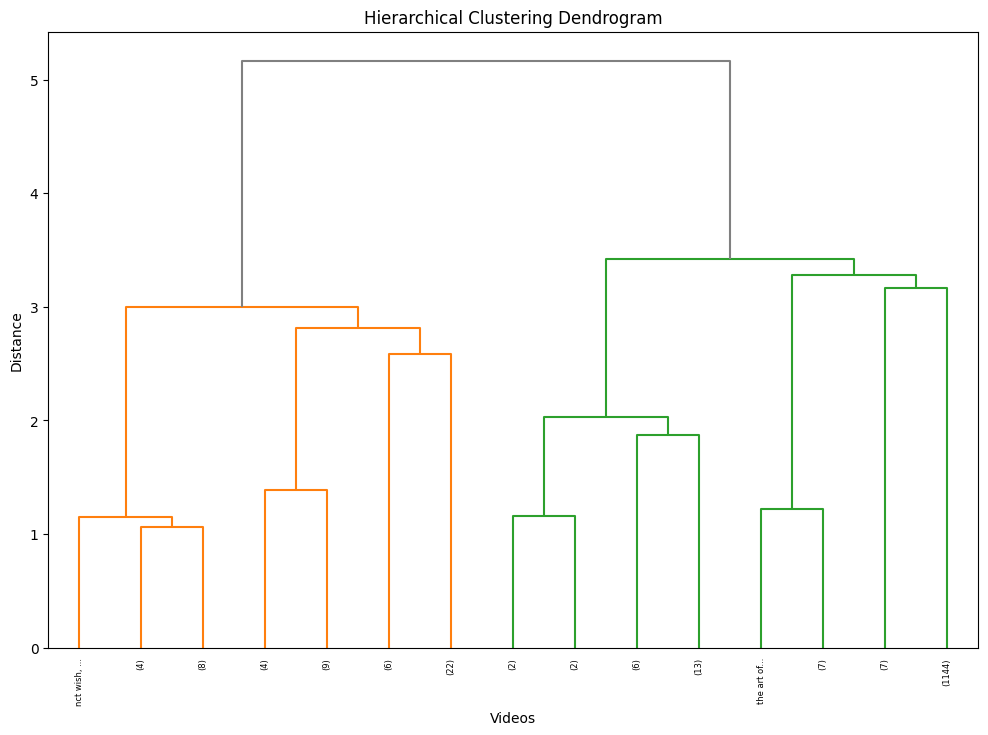

Cluster Information:

Cluster 0:
0    Keemokazi, sophie hesri, keemokazi sisters, ke...
1                                                     
2    ivan young dress, ivan young, Wedding Dress, i...
3    cybertruck, cybertruck fail, Cybertruck Crash ...
4    Olivia Rodrigo, crumblcookies, olivia rodrigo ...
Name: suggested_words, dtype: object

Cluster 1:
53     nct wish, nct official, sakuya nct wish, ryo a...
91     nct wish, nct official, wayv official, sion, t...
143    RIIZE, Mark Lee, nct wish, nct dream, love 119...
185    the boyz, younghoon the boyz, younghoon, taeyo...
239    who you foolin mark lee, mark lee, mark who yo...
Name: suggested_words, dtype: object

Cluster 2:
15    how to curl hair, How To Curl Hair Straightene...
34    hair transformation, hair transition, short ha...
56    people with straight hair saying they have cur...
83    coffee bean brunette, brunette hair, coffee be...
92    derma roller hair growth, Derma Roller, Rosema...
Name: suggested_words, dtype:

In [17]:
# Define a function to shorten the labels
def shorten_label(label, length=10):
    if len(label) > length:
        return label[:length] + "..."
    else:
        return label

# Visualize the dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_rotation=90, leaf_font_size=6, labels=np.array([shorten_label(label) for label in data['suggested_words']]), above_threshold_color='gray')
plt.xlabel("Videos")
plt.ylabel("Distance")
plt.show()

# Display cluster information
print("Cluster Information:")
for cluster_id in range(3):
    print(f"\nCluster {cluster_id}:")
    print(data[data['cluster'] == cluster_id]['suggested_words'].head(5))
